In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO
import json
from nltk.tokenize import word_tokenize
from gensim.models import FastText
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from sklearn.manifold import MDS
from collections import Counter

In [117]:
# Merge all dataframes for the experiments into one (vertically)
import math

humans_df = pd.read_csv('./outputs/rankings_experiment1.csv')
humans_df.rename(columns={"justification": "adjectives"}, inplace=True)
print(humans_df.columns)

developersb_df = pd.read_csv('./outputs/rankings_experiment2b.csv')
developersb_df['who'] = 'tool_retrieve_rank'
print(developersb_df.columns)

gpt_df = pd.read_csv('./outputs/rankings_experiment3.csv')
print(gpt_df.columns)

cohere_df = pd.read_csv('./outputs/rankings_experiment3a.csv')
cohere_df['who'] = 'cohere_zeroshot'
# print(cohere_df.columns)
cohere_df.drop(['_package_name',' adjectives', ' pros', '_package_url', 'benefits', 'drawbacks'], axis=1, inplace=True)
print(cohere_df.columns)

llama2_df = pd.read_csv('./outputs/rankings_experiment3b.csv')
llama2_df['who'] = 'llama2_zeroshot'
print(llama2_df.columns)

gptrag_df = pd.read_csv('./outputs/rankings_experiment4.csv')
gptrag_df['who'] = 'gpt_rag'
print(gptrag_df.columns)

cohererag_df = pd.read_csv('./outputs/rankings_experiment4a.csv')
cohererag_df['who'] = 'cohere_rag'
cohererag_df.drop(['benefits','drawbacks', ' pros/cons'], axis=1, inplace=True)
print(cohererag_df.columns)

llama2rag_df = pd.read_csv('./outputs/rankings_experiment4b.csv')
llama2rag_df['who'] = 'llama2_rag'
print(llama2rag_df.columns)

list_of_dfs = [humans_df, developersb_df, gpt_df, gptrag_df, cohere_df, cohererag_df, llama2_df, llama2rag_df]
allrankings_df = pd.concat(list_of_dfs, axis=0, ignore_index=False)
filtercols = ['package_name', 'adjectives', 'pros', 'cons', 'query', 'who']
allrankings_df = allrankings_df[filtercols]
allrankings_df['adjectives'] = allrankings_df['adjectives'].apply(lambda d: "[]" if pd.isna(d) else d) # Fill NaN with empty list
allrankings_df['adjectives'] = allrankings_df['adjectives'].apply(lambda d: str(d) if d is not d.startswith("[") else d) # Fill NaN with empty list
allrankings_df['adjectives'] = allrankings_df['adjectives'].apply(eval) 
print(set(allrankings_df['who']))
print(allrankings_df.shape)

allrankings_df.sample(20)

Index(['package_name', 'description', 'url', 'year_of_release', 'adjectives',
       'pros', 'cons', 'query', 'who'],
      dtype='object')
Index(['package_name', 'description', 'url', 'year_of_release', 'adjectives',
       'pros', 'cons', 'query', 'who'],
      dtype='object')
Index(['package_name', 'description', 'url', 'year_of_release', 'adjectives',
       'pros', 'cons', 'query', 'who'],
      dtype='object')
Index(['package_name', 'description', 'url', 'year_of_release', 'adjectives',
       'pros', 'cons', 'query', 'who'],
      dtype='object')
Index(['package_name', 'description', 'url', 'year_of_release', 'adjectives',
       'pros', 'cons', 'query', 'who'],
      dtype='object')
Index(['package_name', 'description', 'url', 'year_of_release', 'adjectives',
       'pros', 'cons', 'query', 'who'],
      dtype='object')
Index(['package_name', 'description', 'url', 'year_of_release', 'adjectives',
       'pros', 'cons', 'query', 'who', 'release_year'],
      dtype='object')
Inde

,package_name,adjectives,pros,cons,query,who
36,cansecurity,"[Lightweight, Fast, Customizable]","['Fast and lightweight', 'Customizable', 'Well...",['Requires additional setup'],user authentication,llama2_rag
107,linkscrape,"[Efficient, Versatile, Simplified]",['Allows scraping websites without forcing a D...,"['May not work on all websites without a DOM',...",scraper,cohere_rag
84,mathsass,"[flexible, intuitive, CSS-friendly]",Enables mathematical calculations within Sass ...,Limited to use within Sass stylesheets. May no...,mathematical functions,gpt_rag
63,sentiment,"[Versatile, Extensive, Customizable]",Provides a wide range of sentiment analysis mo...,"Steep learning curve for beginners, slightly c...",sentiment analysis,cohere_zeroshot
145,cheerio,"[Flexible, Optimized, Efficient]",Flexibility and performance focused on server-...,Less suitable for client-side manipulation.,DOM manipulation utils,cohere_zeroshot
93,ng-html-util,"[Easy to use, Integrates with Angular, Well-ma...","['Easy to use', 'Integrates with Angular', 'We...",['Limited features'],mobile app framework,llama2_rag
29,entryway-dynamodb,"[Scalable, Secure, Amazon-aligned]",['Extensive authentication and user management...,"['Limited to AWS environment', 'Complexity due...",user authentication,cohere_rag
48,node-sentiment,"[community, performance]",[],[],sentiment analysis,humans
89,insect,"[versatile, efficient, well-documented]",Enables performing unit conversions with ease....,May not have the same level of performance as ...,mathematical functions,gpt_rag
32,jsonwebtoken,"[Easy-to-use, Lightweight, Trustworthy]","['Simplifies JWT handling', 'Excellent perform...","['Does not handle authentication protocols', '...",user authentication,cohere_zeroshot


In [118]:
import re
#sentence = re.sub(r"\s+", "", sentence, flags=re.UNICODE)

def get_words(df, who):
    xss = df[df['who'] == who]['adjectives'].tolist()
    xss = [x for xs in xss for x in xs if len(xs) > 0]
    result = [x.lower().replace(" ", "-") for x in xss]
    #result = [re.sub(r"\s+", "", x, flags=re.UNICODE).lower() for xs in xss for x in xs] # Remove all whitespaces of each word
    return result

words_humans = get_words(allrankings_df, 'humans')
if "me" in words_humans:
    words_humans.remove("me")
print(len(words_humans), len(set(words_humans)), "adjectives --> humans")

words_gpt = get_words(allrankings_df, 'gpt_zeroshot')
print(len(words_gpt), len(set(words_gpt)), "adjectives --> gpt_zeroshot")
words_gptrag = get_words(allrankings_df, 'gpt_rag')
print(len(words_gptrag), len(set(words_gptrag)), "adjectives --> gpt_rag")

words_cohere = get_words(allrankings_df, 'cohere_zeroshot')
print(len(words_cohere), len(set(words_cohere)), "adjectives --> cohere_zeroshot")
words_cohererag = get_words(allrankings_df, 'cohere_rag')
print(len(words_cohererag), len(set(words_cohererag)), "adjectives --> cohere_rag")

words_llama2 = get_words(allrankings_df, 'llama2_zeroshot')
print(len(words_llama2), len(set(words_llama2)), "adjectives --> llama2_zeroshot")
words_llama2rag = get_words(allrankings_df, 'llama2_rag')
print(len(words_llama2rag), len(set(words_llama2rag)), "adjectives --> llama2_rag")

131 21 adjectives --> humans
546 99 adjectives --> gpt_zeroshot
306 88 adjectives --> gpt_rag
516 165 adjectives --> cohere_zeroshot
336 138 adjectives --> cohere_rag
351 137 adjectives --> llama2_zeroshot
296 113 adjectives --> llama2_rag


In [119]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        if word in self.word_to_color.keys():
            #print(word, self.word_to_color[word])
            return self.word_to_color[word]
        else:
            #print(word, self.default_color)
            return self.default_color
        #return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


def create_color_function(a, b, default_color='gray', tones=False): # default is gray
    common_words = set(a).intersection(set(b))
    print("Common words:", common_words)
    color_to_words = {
        # words below will be colored with a green single color function
        '#FF0000': list(common_words),
        # words will be colored with a blue single color function
        '#0000FF': list(set(a).difference(set(b))),
        # words will be colored with a green single color function
        '#15B01A': list(set(b).difference(set(a)))
    }
    if tones:
        grouped_color_func = GroupedColorFunc(color_to_words, default_color)
    else: 
        grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
    return grouped_color_func

def show_wordcloud(words, title=""):
    wc = WordCloud(width=800, height=400, background_color="white", collocations=True,
                       max_words=2000, contour_width=3, contour_color='steelblue')
    wc.generate(" ".join(words))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()

def show_wordcloud_comparison(words1, words2, title=""):
    text = " ".join(words1 + words2)
    wordcloud5 = WordCloud(width=800, height=400, background_color="white", collocations=True,
                       max_words=100, contour_width=3, contour_color='steelblue')
    wordcloud5.generate(text)
    wa = wordcloud5.process_text(" ".join(words1))
    wa = [x[0] for x in wa.items()]
    wb = wordcloud5.process_text(" ".join(words2))
    wb = [x[0] for x in wb.items()]
    my_color_func = create_color_function(wa, wb)
    wordcloud5 = wordcloud5.recolor(color_func=my_color_func)
    plt.imshow(wordcloud5, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()

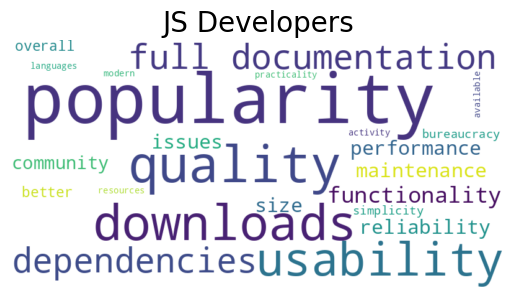

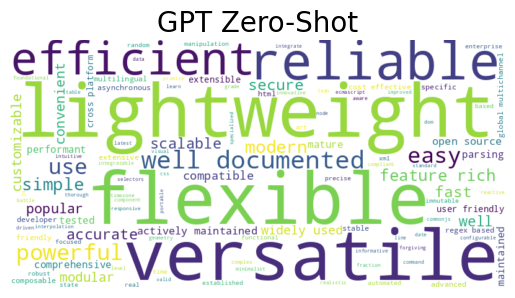

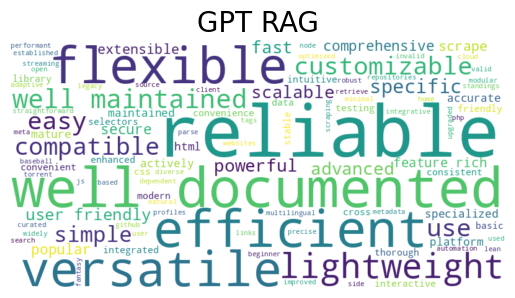

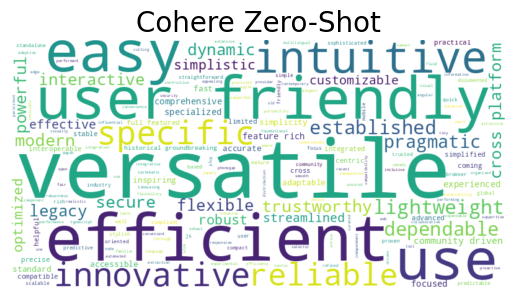

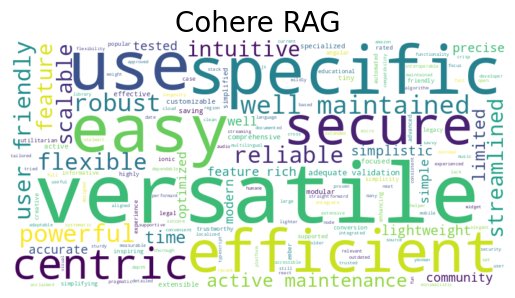

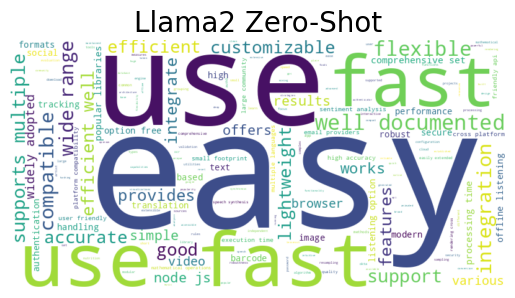

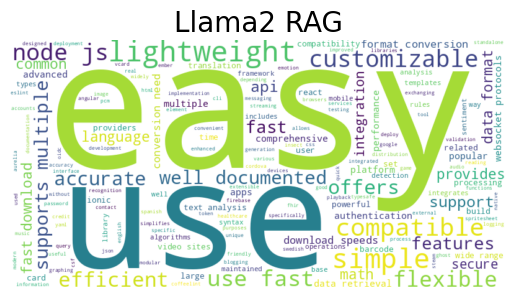

In [120]:
show_wordcloud(words_humans, title="JS Developers")

show_wordcloud(words_gpt, title="GPT Zero-Shot")
show_wordcloud(words_gptrag, title="GPT RAG")

show_wordcloud(words_cohere, title="Cohere Zero-Shot")
show_wordcloud(words_cohererag, title="Cohere RAG")

show_wordcloud(words_llama2, title="Llama2 Zero-Shot")
show_wordcloud(words_llama2rag, title="Llama2 RAG")

Common words: {'modern'}


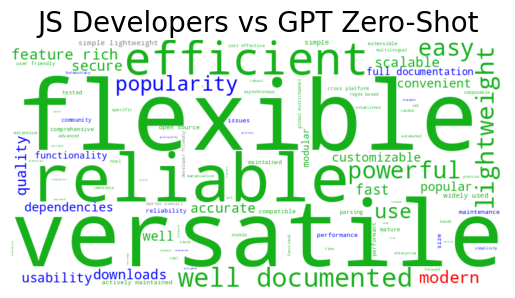

Common words: {'modern'}


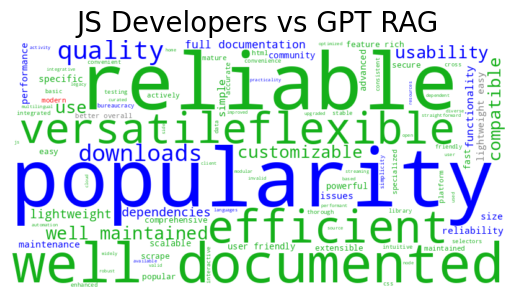

In [121]:
show_wordcloud_comparison(words_humans, words_gpt, title="JS Developers vs GPT Zero-Shot")
show_wordcloud_comparison(words_humans, words_gptrag, title="JS Developers vs GPT RAG")

Common words: {'simplicity', 'modern', 'performance', 'community'}


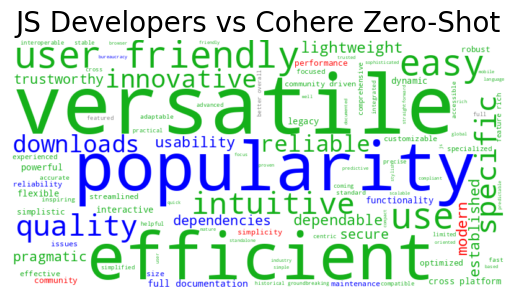

Common words: {'simplicity', 'functionality', 'modern', 'community'}


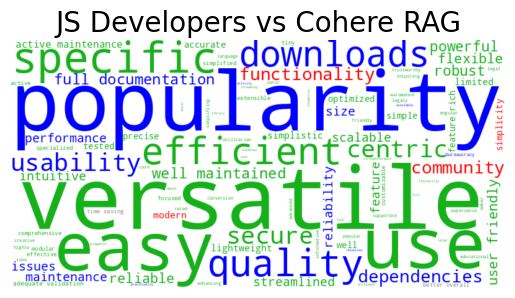

In [122]:
show_wordcloud_comparison(words_humans, words_cohere, title="JS Developers vs Cohere Zero-Shot")
show_wordcloud_comparison(words_humans, words_cohererag, title="JS Developers vs Cohere RAG")

Common words: {'performance', 'modern', 'resources', 'available', 'functionality', 'popularity', 'quality', 'community'}


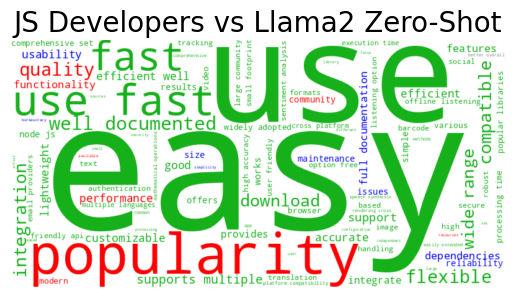

Common words: {'modern', 'performance'}


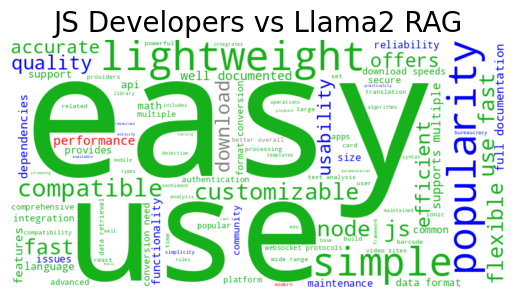

In [123]:
show_wordcloud_comparison(words_humans, words_llama2, title="JS Developers vs Llama2 Zero-Shot")
show_wordcloud_comparison(words_humans, words_llama2rag, title="JS Developers vs Llama2 RAG")

Common words: {'specific', 'foundational', 'cross platform', 'thorough', 'feature rich', 'versatile', 'js', 'well', 'simple', 'specialized', 'precise', 'comprehensive', 'stable', 'automated', 'performant', 'realistic', 'advanced', 'innovative', 'visual', 'aware', 'secure', 'powerful', 'user friendly', 'scalable', 'learn', 'compliant', 'informative', 'fast', 'flexible', 'established', 'lightweight', 'compatible', 'robust', 'intuitive', 'extensive', 'friendly', 'easy', 'customizable', 'responsive', 'based', 'mature', 'focused', 'multilingual', 'standard', 'convenient', 'use', 'component', 'driven', 'modern', 'node', 'reliable', 'efficient', 'accurate'}


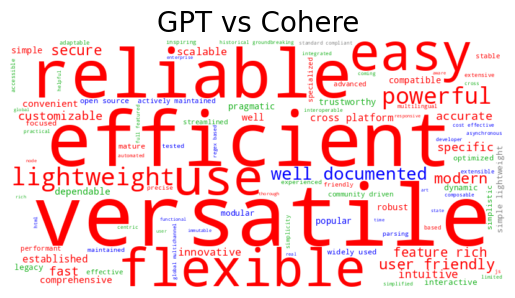

Common words: {'streaming', 'specific', 'thorough', 'feature rich', 'versatile', 'js', 'straightforward', 'optimized', 'minimal', 'consistent', 'simple', 'source', 'specialized', 'precise', 'extensible', 'comprehensive', 'open', 'performant', 'advanced', 'secure', 'powerful', 'user friendly', 'scalable', 'fast', 'flexible', 'integrated', 'maintained', 'lightweight', 'robust', 'popular', 'intuitive', 'modular', 'friendly', 'user', 'easy', 'platform', 'customizable', 'based', 'cloud', 'library', 'multilingual', 'cross', 'convenient', 'use', 'well maintained', 'modern', 'legacy', 'reliable', 'efficient', 'accurate', 'node'}


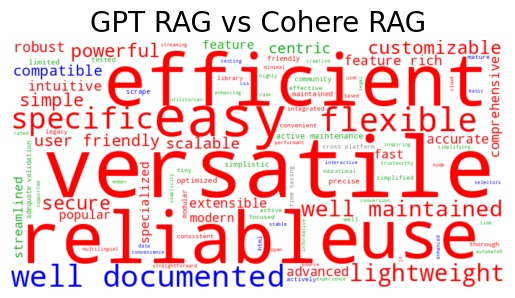

In [124]:
show_wordcloud_comparison(words_gpt, words_cohere, title="GPT vs Cohere")
show_wordcloud_comparison(words_gptrag, words_cohererag, title="GPT RAG vs Cohere RAG")

Common words: {'cross platform', 'simple', 'extensible', 'comprehensive', 'advanced', 'secure', 'powerful', 'user friendly', 'learn', 'fast', 'flexible', 'established', 'maintained', 'lightweight', 'compatible', 'robust', 'popular', 'intuitive', 'extensive', 'modular', 'easy', 'well documented', 'customizable', 'based', 'integrate', 'use', 'complex', 'modern', 'reliable', 'efficient', 'accurate'}


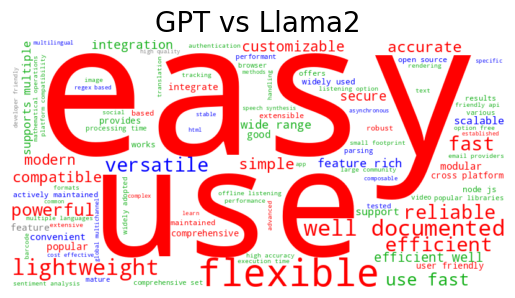

Common words: {'streaming', 'specific', 'used', 'improved', 'simple', 'extensible', 'comprehensive', 'advanced', 'secure', 'powerful', 'fast', 'flexible', 'integrated', 'maintained', 'widely', 'lightweight', 'compatible', 'popular', 'modular', 'friendly', 'user', 'easy', 'platform', 'well documented', 'customizable', 'css', 'testing', 'html', 'library', 'convenient', 'use', 'enhanced', 'modern', 'efficient', 'accurate'}


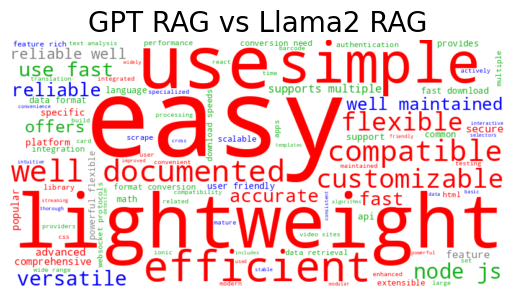

In [125]:
show_wordcloud_comparison(words_gpt, words_llama2, title="GPT vs Llama2")
show_wordcloud_comparison(words_gptrag, words_llama2rag, title="GPT RAG vs Llama2 RAG")

Common words: {'cross platform', 'integration', 'robustness', 'simple', 'comprehensive', 'focus', 'advanced', 'secure', 'powerful', 'user friendly', 'learn', 'quick', 'fast', 'flexible', 'established', 'lightweight', 'independent', 'compatible', 'robust', 'compact', 'community', 'intuitive', 'browser', 'interactive', 'extensive', 'user', 'easy', 'customizable', 'based', 'accessible', 'performance', 'use', 'flexibility', 'modern', 'reliable', 'efficient', 'accurate', 'supported', 'security'}


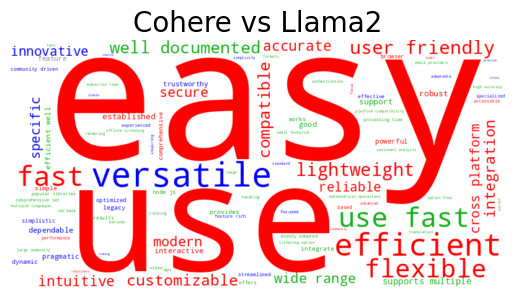

Common words: {'streaming', 'specific', 'well', 'audio', 'simple', 'extensible', 'useful', 'comprehensive', 'language', 'advanced', 'secure', 'powerful', 'fast', 'flexible', 'integrated', 'maintained', 'lightweight', 'popular', 'compatibility', 'angular', 'modular', 'friendly', 'user', 'easy', 'platform', 'time', 'customizable', 'react', 'large', 'music', 'library', 'ionic', 'ember', 'convenient', 'use', 'modern', 'mobile', 'efficient', 'accurate', 'set', 'designed'}


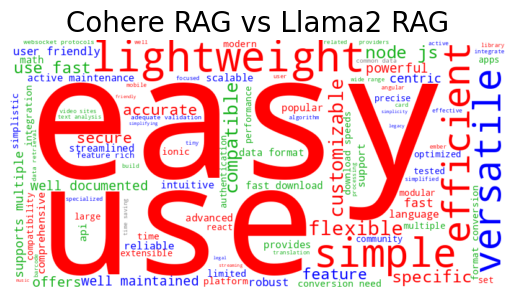

In [126]:
show_wordcloud_comparison(words_cohere, words_llama2, title="Cohere vs Llama2")
show_wordcloud_comparison(words_cohererag, words_llama2rag, title="Cohere RAG vs Llama2 RAG")

In [127]:
# from nltk import word_tokenize, pos_tag
# from nltk.corpus import wordnet as wn
# import spacy
# #from spacy.en import English
# from spacy.tokenizer import Tokenizer
# #nlp = spacy.load("en_core_web")

# text = list(set(words_gpt + words_gptrag + words_humans))
# text = " ".join(text)
# #pos_tag(word_tokenize(text))
# for tok, pos in pos_tag(word_tokenize(text)):
#     pos = pos[0].lower()
#     if pos in ['a', 'n', 'v']:
#         print(tok, ":", wn.synsets(tok, pos))

In [128]:
# Convert evertyhing to lowercase
allrankings_df['adjectives'] = allrankings_df['adjectives'].apply(lambda d: [x.lower() for x in d]) 
#allrankings_df['adjectives'].tolist()

sentences = [word_tokenize(' '.join(x)) for x in allrankings_df['adjectives'].tolist() if len(x) > 0]
print(random.sample(sentences, 20))

# Learning the embeddings for the sentences
embeddings_model = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

[['flexible', 'easy', 'to', 'use', 'comprehensive'], ['tiny', 'fast', 'efficient'], ['responsive', 'easy-to-use', 'jquery-based'], ['barcode', 'reading', 'node.js', 'compatibility', 'simple', 'implementation'], ['customizable', 'interoperable', 'interactive'], ['simple', 'efficient', 'flexible'], ['simple', 'lightweight', 'well-documented'], ['powerful', 'flexible', 'well-maintained'], ['modern', 'specific', 'use', 'case', 'active', 'maintenance'], ['reliable', 'efficient', 'well-documented'], ['accurate', 'easy', 'to', 'use', 'widely', 'used'], ['performance', 'size'], ['flexible', 'and', 'customizable', 'easy', 'to', 'use', 'accurate', 'data', 'retrieval'], ['fast', 'secure', 'customizable'], ['popularity'], ['powerful', 'versatile', 'popular'], ['compatible', 'social', 'nutrition', 'tracking'], ['yaml', 'is', 'a', 'common', 'data', 'format', 'conversion', 'need', '.'], ['integrated', 'cross-platform', 'well-maintained'], ['lightweight', 'easy', 'to', 'use', 'customizable']]


In [129]:
# Test
a = embeddings_model.wv['performance']
b = embeddings_model.wv['nothing']
#print(1-spatial.distance.cosine(a, b)) # Cosine similarity
print(cosine_similarity(a.reshape(1, -1), b.reshape(1, -1))[0][0]) # Cosine similarity

print()
embeddings_model.wv.most_similar('performance')

0.999499



[('high-performance', 0.9999395608901978),
 ('performance-oriented', 0.9999293684959412),
 ('performing', 0.9999053478240967),
 ('automation', 0.9999040365219116),
 ('performant', 0.9999018907546997),
 ('integration', 0.9998984932899475),
 ('information', 0.9998975992202759),
 ('integrations', 0.9998965263366699),
 ('integrative', 0.9998923540115356),
 ('compatible', 0.9998912215232849)]

In [140]:
def plot_2d_embeddings(embeddings_2d=None, distance_matrix=None, title="", view="matplotlib", properties=None, 
                       annotations=False, random_seed=1, words_to_remove=[], filename=None):
    
    if len(words_to_remove) > 0:
        distance_matrix.drop(words_to_remove, axis=0, inplace=True)
        distance_matrix.drop(words_to_remove, axis=1, inplace=True)

    if embeddings_2d is None:
        mds = MDS(dissimilarity='precomputed', random_state=random_seed)
        embeddings_2d = mds.fit_transform(distance_matrix)

    if view == "matplotlib":
        #create scatterplot
        plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], alpha=0.6)
        #add axis labels
        #plt.xlabel('x')
        #plt.ylabel('y')
    else: # sns
        df = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
        df['frequency'] = [properties[k]['frequency'] for k in properties.keys() if k not in words_to_remove] 
        df['model'] = [properties[k]['who'] for k in properties.keys() if k not in words_to_remove] 
        words = [x for x in list(properties.keys()) if x not in words_to_remove]
        df['source'] = words
        model_order = list(df['model'].unique()) #['humans', 'cohere', 'llama2', 'rag'] # list(df['model'].unique())
        model_order.insert(0, model_order.pop(model_order.index('humans')))
        # print(model_order)
        # print(df['who'].unique())
        ax = sns.scatterplot(data=df, x="x", y="y", hue="model", palette="Set1", size="frequency", 
                alpha=0.6, sizes=(50, 300), hue_order=model_order) #, markers=["o", "x", "1"])
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        plt.setp(ax.get_legend().get_texts(), fontsize='6') # for legend text
        # plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    #add lables to each point
    if annotations:
        for i, txt in enumerate(words):
            plt.annotate(txt, (embeddings_2d[:,0][i], embeddings_2d[:,1][i]), fontsize=7)

    #display scatterplot
    plt.yticks([], [])
    plt.xticks([], [])
    #plt.legend([],[], frameon=False)
    plt.grid(False)
    if filename is not None:
        plt.savefig(filename,dpi=600, bbox_inches='tight')
    plt.title(title)
    plt.show()

In [131]:
def compute_properties(embeddings_model, words1, words2, labels, k_percentage=0.07):
    all_words = words1 + words2
    counter_words = sorted(Counter(all_words).items(), key=lambda item: (-item[1], item[0]))

    k = round(k_percentage * len(counter_words))
    print("k - lenght:", k, len(counter_words))
    top_k_words = counter_words[0:k]

    words_properties = dict()
    all_frequencies = set()
    for k,v in top_k_words:
        words_properties[k] = dict()
        words_properties[k]['frequency'] = v
        all_frequencies.add(v)
        if (k in words1) and (k not in words2):
            words_properties[k]['who'] = labels[0]
        elif (k not in words1) and (k in words2):
            words_properties[k]['who'] = labels[1]
        else: 
            words_properties[k]['who'] = 'both'
    print("min-max freq:", min(all_frequencies), max(all_frequencies))

    distance_matrix = dict()
    for w1, _ in top_k_words:
        distance_matrix[w1] = dict()
        for w2, _ in top_k_words:
            if w1 != w2:
                #distance_matrix[w1][w2] = 1 - cosine_similarity(embeddings_model.wv[w1].reshape(1, -1), embeddings_model.wv[w2].reshape(1, -1))[0][0]
                distance_matrix[w1][w2] = spatial.distance.cosine(embeddings_model.wv[w1], embeddings_model.wv[w2])    
            else:
                distance_matrix[w1][w2] = 0.0
    distance_df = pd.DataFrame(distance_matrix)

    return words_properties, distance_df, top_k_words


In [132]:
# mds = MDS(dissimilarity='precomputed', random_state=1)
# embeddings_2d = mds.fit_transform(distance_df)

k - lenght: 16 108
min-max freq: 9 25
[('popularity', 25), ('reliable', 24), ('well-documented', 22), ('efficient', 19), ('flexible', 18), ('versatile', 17), ('lightweight', 15), ('quality', 12), ('downloads', 11), ('well-maintained', 11), ('compatible', 10), ('customizable', 10), ('easy-to-use', 10), ('usability', 10), ('dependencies', 9), ('full-documentation', 9)]


/Users/adiazpace/opt/anaconda3/envs/aidt_gpt/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


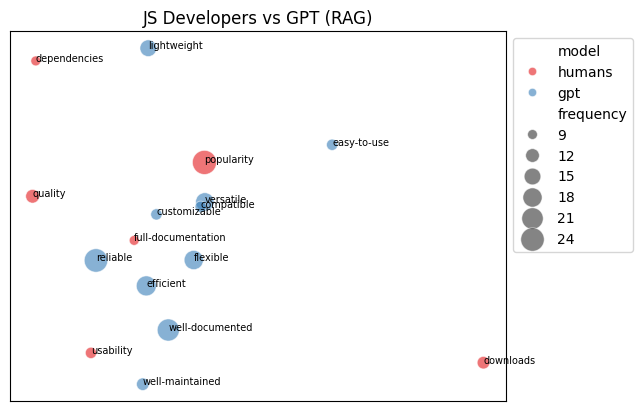

In [141]:
words_properties, distance_df, top_k_words = compute_properties(embeddings_model, words_humans, words_gptrag, 
                                                                labels=['humans', 'gpt'], k_percentage=0.15)
print(top_k_words)
plot_2d_embeddings(distance_matrix=distance_df, title="JS Developers vs GPT (RAG)", view='sns', 
                   properties=words_properties, annotations=True, random_seed=1, filename="developers_vs_gptrag.pdf")

k - lenght: 18 119
min-max freq: 11 38
[('lightweight', 38), ('flexible', 37), ('versatile', 35), ('efficient', 34), ('reliable', 34), ('well-documented', 33), ('powerful', 27), ('easy-to-use', 25), ('popularity', 25), ('modern', 16), ('simple', 15), ('feature-rich', 13), ('fast', 12), ('quality', 12), ('secure', 12), ('accurate', 11), ('downloads', 11), ('scalable', 11)]


/Users/adiazpace/opt/anaconda3/envs/aidt_gpt/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


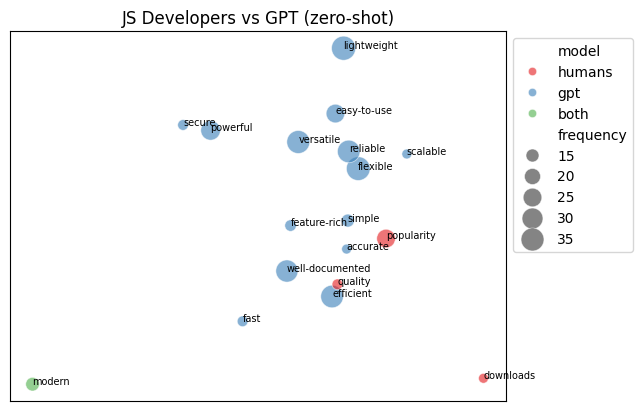

In [142]:
words_properties, distance_df, top_k_words = compute_properties(embeddings_model, words_humans, words_gpt, 
                                                                labels=['humans', 'gpt'], k_percentage=0.15)
print(top_k_words)
plot_2d_embeddings(distance_matrix=distance_df, title="JS Developers vs GPT (zero-shot)", view='sns', 
                   properties=words_properties, annotations=True, random_seed=0, filename="developers_vs_gpt0zhot.pdf")

k - lenght: 24 157
min-max freq: 6 26
[('versatile', 26), ('popularity', 25), ('easy-to-use', 15), ('efficient', 12), ('quality', 12), ('downloads', 11), ('specific', 11), ('secure', 10), ('usability', 10), ('dependencies', 9), ('full-documentation', 9), ('well-maintained', 9), ('functionality', 8), ('powerful', 8), ('robust', 8), ('flexible', 7), ('reliable', 7), ('user-friendly', 7), ('active-maintenance', 6), ('intuitive', 6), ('issues', 6), ('maintenance', 6), ('performance', 6), ('reliability', 6)]


/Users/adiazpace/opt/anaconda3/envs/aidt_gpt/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


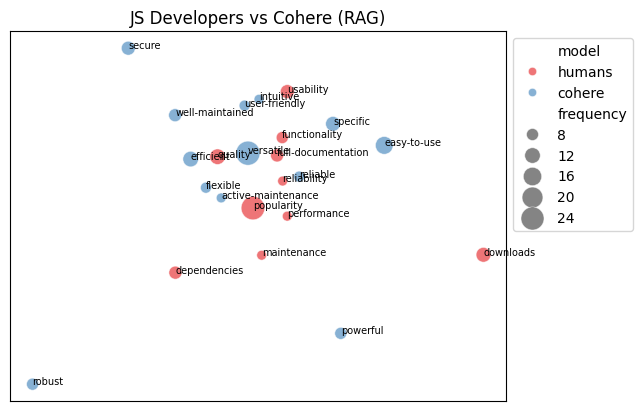

In [144]:
words_properties, distance_df, top_k_words = compute_properties(embeddings_model, words_humans, words_cohererag, 
                                                labels=['humans', 'cohere'], k_percentage=0.15)
print(top_k_words)
plot_2d_embeddings(distance_matrix=distance_df, title="JS Developers vs Cohere (RAG)", view='sns', 
                   properties=words_properties, annotations=True, random_seed=1, filename="developers_vs_cohererag.pdf", 
                   words_to_remove=['issues'])

k - lenght: 28 184
min-max freq: 8 39
[('versatile', 39), ('popularity', 25), ('efficient', 23), ('user-friendly', 19), ('easy-to-use', 17), ('intuitive', 13), ('innovative', 12), ('quality', 12), ('downloads', 11), ('lightweight', 11), ('dependable', 10), ('established', 10), ('modern', 10), ('specific', 10), ('usability', 10), ('dependencies', 9), ('full-documentation', 9), ('pragmatic', 9), ('reliable', 9), ('secure', 9), ('trustworthy', 9), ('cross-platform', 8), ('dynamic', 8), ('flexible', 8), ('functionality', 8), ('interactive', 8), ('legacy', 8), ('powerful', 8)]


/Users/adiazpace/opt/anaconda3/envs/aidt_gpt/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


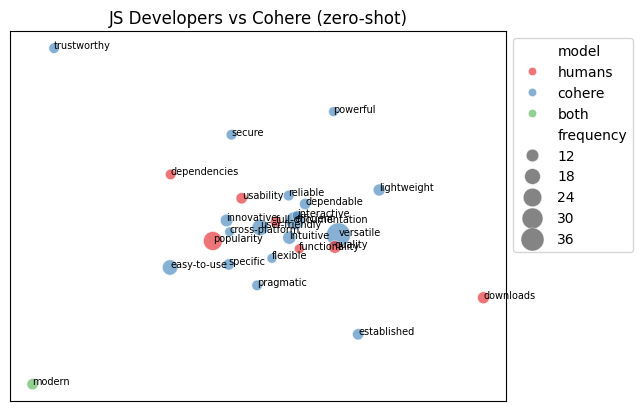

In [145]:
words_properties, distance_df, top_k_words = compute_properties(embeddings_model, words_humans, words_cohere, 
                                                labels=['humans', 'cohere'], k_percentage=0.15)
print(top_k_words)
plot_2d_embeddings(distance_matrix=distance_df, title="JS Developers vs Cohere (zero-shot)", view='sns', 
                   properties=words_properties, annotations=True, random_seed=0, filename="developers_vs_cohere0shot.pdf",
                   words_to_remove=['legacy', 'dynamic'])

k - lenght: 20 134
min-max freq: 6 39
[('easy-to-use', 39), ('popularity', 25), ('lightweight', 23), ('fast', 17), ('simple', 14), ('compatible-with-node.js', 13), ('customizable', 13), ('quality', 12), ('downloads', 11), ('efficient', 11), ('usability', 10), ('well-documented', 10), ('dependencies', 9), ('flexible', 9), ('full-documentation', 9), ('functionality', 8), ('issues', 6), ('maintenance', 6), ('performance', 6), ('reliability', 6)]


/Users/adiazpace/opt/anaconda3/envs/aidt_gpt/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


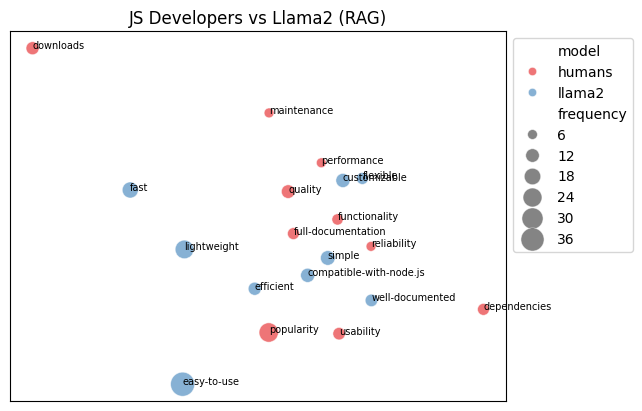

In [146]:
words_properties, distance_df, top_k_words = compute_properties(embeddings_model, words_humans, words_llama2rag, 
                                                labels=['humans', 'llama2'], k_percentage=0.15)
print(top_k_words)
plot_2d_embeddings(distance_matrix=distance_df, title="JS Developers vs Llama2 (RAG)", view='sns', 
                   properties=words_properties, annotations=True, random_seed=0, filename="developers_vs_llama2rag.pdf",
                   words_to_remove=['issues'])

k - lenght: 23 156
min-max freq: 5 60
[('easy-to-use', 60), ('popularity', 26), ('well-documented', 16), ('fast', 12), ('quality', 12), ('downloads', 11), ('usability', 10), ('dependencies', 9), ('full-documentation', 9), ('fast-and-efficient', 8), ('functionality', 8), ('customizable', 7), ('lightweight', 7), ('compatible-with-node.js', 6), ('efficient', 6), ('flexible', 6), ('issues', 6), ('maintenance', 6), ('performance', 6), ('reliability', 6), ('size', 6), ('community', 5), ('compatible', 5)]


/Users/adiazpace/opt/anaconda3/envs/aidt_gpt/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


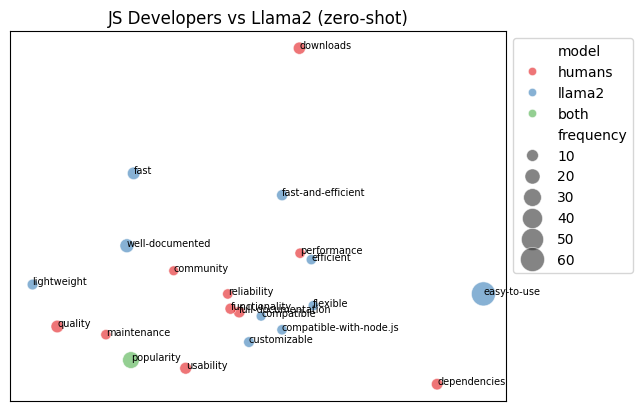

In [147]:
words_properties, distance_df, top_k_words = compute_properties(embeddings_model, words_humans, words_llama2, 
                                                labels=['humans', 'llama2'], k_percentage=0.15)
print(top_k_words)
plot_2d_embeddings(distance_matrix=distance_df, title="JS Developers vs Llama2 (zero-shot)", view='sns', 
                   properties=words_properties, annotations=True, random_seed=3, filename="developers_vs_llama20shot.pdf", 
                   words_to_remove=['size', 'issues'])